<a href="https://colab.research.google.com/github/KhaiHoanNinh/bt_AI/blob/main/nhandien3nguoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
# Load Data 
with open('Nhandien3nguoi.pickle', 'rb') as f:
  (x_train, y_train),(x_test, y_test) = pickle.load(f)

# Reshape Data
x_pre1 = x_train
x_pre2 = x_test

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 4)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [3]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 15s 1s/step - loss: 7.0784 - acc: 0.0000e+00 - val_loss: 18.1298 - val_acc: 0.1667
Epoch 2/15
2/2 [==============================] - 0s 69ms/step - loss: 12.8344 - acc: 0.3889 - val_loss: 1.7286 - val_acc: 0.3889
Epoch 3/15
2/2 [==============================] - 0s 67ms/step - loss: 2.4959 - acc: 0.3194 - val_loss: 1.1278 - val_acc: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 66ms/step - loss: 0.8174 - acc: 0.6944 - val_loss: 0.2449 - val_acc: 1.0000
Epoch 5/15
2/2 [==============================] - 0s 65ms/step - loss: 0.2468 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 1.0000
Epoch 6/15
2/2 [==============================] - 0s 67ms/step - loss: 0.0724 - acc: 1.0000 - val_loss: 0.0334 - val_acc: 1.0000
Epoch 7/15
2/2 [==============================] - 0s 66ms/step - loss: 0.0251 - acc: 1.0000 - val_loss: 3.7250e-04 - val_acc: 1.0000
Epoch 8/15
2/2 [==============================] - 0s 66ms/step - loss: 4.6899e-04 - acc: 1.0000 - v

(150, 150, 3)
[0]


'Đây là Hoàn'

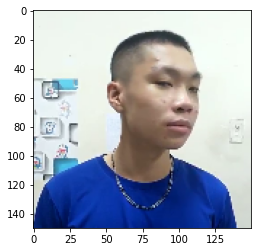

In [15]:
test = 10
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Hoàn', 'Đây là Vượng', 'Đây là Thông']
Label[pred[0]]

(150, 150, 3)
[1]


'Đây là Vượng'

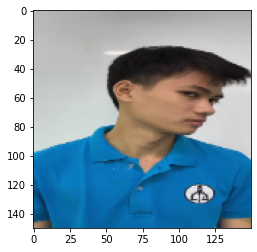

In [16]:
test = 150
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Quốc', 'Đây là Vượng', 'Đây là Thông']
Label[pred[0]]

(150, 150, 3)
[2]


'Đây là Thông'

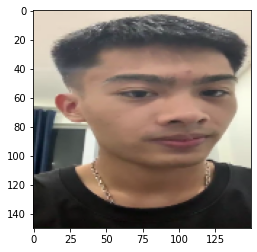

In [17]:
test = 180
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Quốc', 'Đây là Vượng', 'Đây là Thông']
Label[pred[0]]